In [20]:
from dataclasses import dataclass
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [21]:

# Creation of the sparse matrix
def sparse(i, j, v, m, n):
    return csr_matrix((v, (i, j)), shape=(m, n))

# MIXING GRADIENT APPROACH

In [22]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve

import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve

def sol_Laplace_Equation_Axb(f, dom2Inp, source, offset):
    y_start, y_end = offset[1], offset[1] + dom2Inp.shape[0]
    x_start, x_end = offset[0], offset[0] + dom2Inp.shape[1]

    target_mask = np.zeros_like(f[:, :, 0])
    target_mask[y_start:y_end, x_start:x_end] = dom2Inp

    source_region = source[0:dom2Inp.shape[0], 0:dom2Inp.shape[1]]
    n = y_end - y_start
    m = x_end - x_start

    i = []
    j = []
    v = []
    b = []

    for x in range(m):
        for y in range(n):
            k = x + y * m

            if target_mask[y + y_start, x + x_start]:
                indices = [k]
                values = [4]

                if x > 0:
                    if x + x_start - 1 >= 0:
                        Np_left_s = source_region[y, x] - source_region[y, x - 1]
                        Np_left_t = f[y + y_start, x + x_start] - f[y + y_start, x + x_start - 1]
                        gradient_value = np.where(
                            np.abs(Np_left_s) > np.abs(Np_left_t), Np_left_s, Np_left_t
                        )
                        indices.append(k - 1)
                        values.append(-1)
                        b.append(gradient_value)

                if x < m - 1:
                    if x + x_start + 1 < f.shape[1]:
                        Np_right_s = source_region[y, x] - source_region[y, x + 1]
                        Np_right_t = f[y + y_start, x + x_start] - f[y + y_start, x + x_start + 1]
                        gradient_value = np.where(
                            np.abs(Np_right_s) > np.abs(Np_right_t), Np_right_s, Np_right_t
                        )
                        indices.append(k + 1)
                        values.append(-1)
                        b.append(gradient_value)

                if y > 0:
                    if y + y_start - 1 >= 0:
                        Np_up_s = source_region[y, x] - source_region[y - 1, x]
                        Np_up_t = f[y + y_start, x + x_start] - f[y + y_start - 1, x + x_start]
                        gradient_value = np.where(
                            np.abs(Np_up_s) > np.abs(Np_up_t), Np_up_s, Np_up_t
                        )
                        indices.append(k - m)
                        values.append(-1)
                        b.append(gradient_value)

                if y < n - 1:
                    if y + y_start + 1 < f.shape[0]:
                        Np_down_s = source_region[y, x] - source_region[y + 1, x]
                        Np_down_t = f[y + y_start, x + x_start] - f[y + y_start + 1, x + x_start]
                        gradient_value = np.where(
                            np.abs(Np_down_s) > np.abs(Np_down_t), Np_down_s, Np_down_t
                        )
                        indices.append(k + m)
                        values.append(-1)
                        b.append(gradient_value)

                i.extend([k] * len(indices))
                j.extend(indices)
                v.extend(values)
            else:
                i.append(k)
                j.append(k)
                v.append(1)
                b.append(0)

    mat_A = csr_matrix((v, (i, j)), shape=(m * n, m * n))

    mask_flat = target_mask[y_start:y_end, x_start:x_end].flatten()
    for channel in range(source_region.shape[2]):
        source_flat = source_region[:, :, channel].flatten()
        target_flat = f[y_start:y_end, x_start:x_end, channel].flatten()

        b = mat_A.dot(source_flat)
        mat_b = b 
        mat_b[mask_flat == 0] = target_flat[mask_flat == 0]

        x = spsolve(mat_A, mat_b)
        x = x.reshape((y_end - y_start, x_end - x_start))
        x[x > 255] = 255
        x[x < 0] = 0
        x = x.astype('uint8')

        f[y_start:y_end, x_start:x_end, channel] = x

    return f

def sparse(i, j, v, m, n):
    return csr_matrix((v, (i, j)), shape=(m, n))


target shape: (4032, 3024, 3)
source shape: (720, 1280, 3)
mask shape:   (720, 1280)


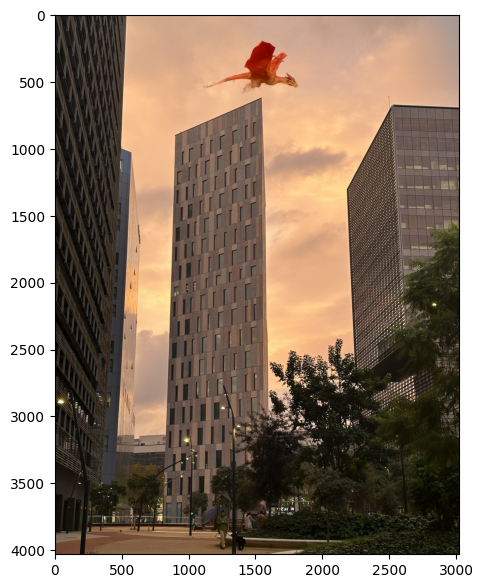

In [23]:
source = cv2.imread("/Users/dianatat/Documents/Master/C2 Optimisation techniques for CV/Project/week2/code/pictures/DRAGON SOURCE.jpeg")
source = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
# source = cv2.resize(source,(400,400))

mask   = cv2.imread("/Users/dianatat/Documents/Master/C2 Optimisation techniques for CV/Project/week2/code/pictures/DRAGON mask 2.png")
# mask = cv2.resize(mask,(200,200))

mask   = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
target = cv2.imread("/Users/dianatat/Documents/Master/C2 Optimisation techniques for CV/Project/week2/code/pictures/TARGET.jpg")
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
# target = cv2.resize(target,(200,200))


print(f"target shape: {target.shape}")
print(f"source shape: {source.shape}")
print(f"mask shape:   {mask.shape}")
result = sol_Laplace_Equation_Axb(f=target,dom2Inp=mask,source=source,offset=(850, 100))
plt.figure(figsize=(7,7))
plt.imshow(result)

target shape: (2816, 2112, 3)
source shape: (500, 333, 3)
mask shape:   (500, 333)


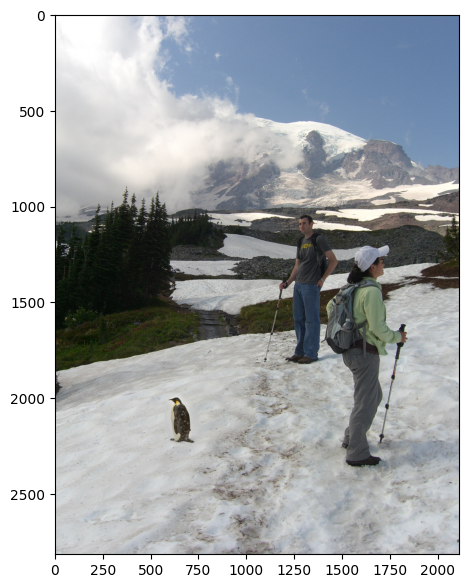

In [24]:
# Define the directories for your images

source = cv2.imread('/Users/dianatat/Documents/Master/C2 Optimisation techniques for CV/Project/week2/code/pictures/penguin.jpg')
source = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)

mask = cv2.imread('/Users/dianatat/Documents/Master/C2 Optimisation techniques for CV/Project/week2/code/pictures/PENGUIN MASK.png')
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

target = cv2.imread('/Users/dianatat/Documents/Master/C2 Optimisation techniques for CV/Project/week2/code/pictures/PENGUIN BACKGROUND.JPG')
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)


print(f"target shape: {target.shape}")
print(f"source shape: {source.shape}")
print(f"mask shape:   {mask.shape}")
result = sol_Laplace_Equation_Axb(f=target,dom2Inp=mask,source=source,offset=(450, 1800))
plt.figure(figsize=(7,7))
plt.imshow(result)



target shape: (698, 938, 3)
source shape: (398, 606, 3)
mask shape:   (398, 606)


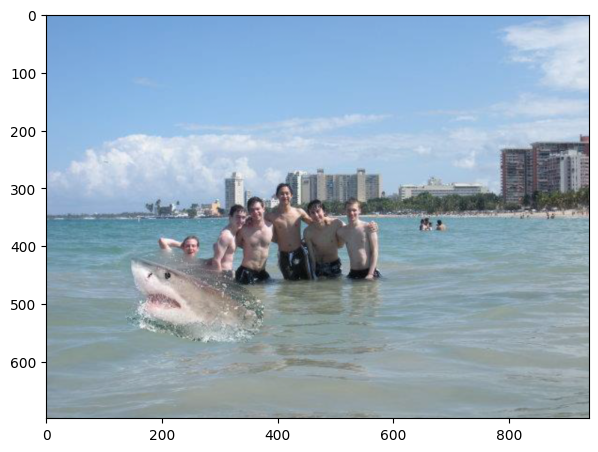

In [25]:
source = cv2.imread("/Users/dianatat/Documents/Master/C2 Optimisation techniques for CV/Project/week2/code/pictures/source_shark.png")
source = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
# source = cv2.resize(source,(400,400))

mask   = cv2.imread("/Users/dianatat/Documents/Master/C2 Optimisation techniques for CV/Project/week2/code/pictures/mask_shark.png")
# mask = cv2.resize(mask,(200,200))

mask   = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
target = cv2.imread("/Users/dianatat/Documents/Master/C2 Optimisation techniques for CV/Project/week2/code/pictures/target_shark.png")
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
# target = cv2.resize(target,(200,200))


print(f"target shape: {target.shape}")
print(f"source shape: {source.shape}")
print(f"mask shape:   {mask.shape}")
result = sol_Laplace_Equation_Axb(f=target,dom2Inp=mask,source=source,offset=(50, 300))
plt.figure(figsize=(7,7))
plt.imshow(result)